In [29]:
import networkx as nx
from networkx.algorithms.cuts import cut_size
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import pickle
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
def draw_network_colored(g, p, colors = 'default', fs = (8,4)):

    if colors == 'default': colors = {i:0 for i in g.nodes()}
    plt.figure(figsize = fs)
    nx.draw_networkx(g,
                     pos=p,
                     font_size = 12,
                     font_weight = 'bold',
                     font_color = 'plum',
                     edge_color = 'grey',
                     arrowsize = 20
                    )

    nodes = nx.draw_networkx_nodes(g, p,cmap=plt.get_cmap('Blues') ,node_color= [c for c in colors.values()],node_size = 300)
    nodes.set_edgecolor('lightgrey')
    plt.axis('off')
    plt.show()

C:\Users\corti\miniconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:315: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


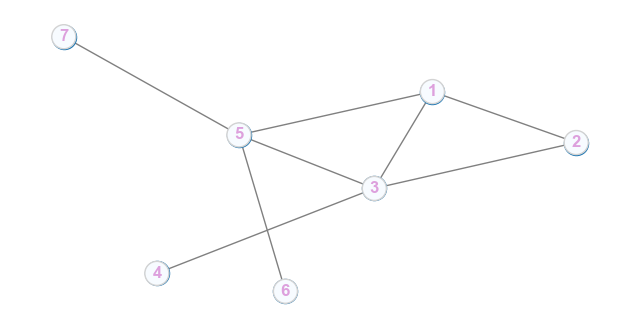

In [4]:
exercise_graph = nx.Graph()
exercise_graph.add_edges_from([(1,2),(1,3),(1,5),(2,3),(3,4),(3,5),(5,6),(5,7)])
p = nx.spring_layout(exercise_graph)
draw_network_colored(exercise_graph, p, {i:0 for i in exercise_graph.nodes()})

In [5]:
print('exercise graph - dictionary keyed by nodes: number of triangles {}'.format(nx.triangles(exercise_graph)))
print('exercise graph - number of triangles of node labelled 1: {}'.format(nx.triangles(exercise_graph,1)))
print('exercise graph - list of the number of triangles: {}'.format(sum(nx.triangles(exercise_graph).values())/3))

exercise graph - dictionary keyed by nodes: number of triangles {1: 2, 2: 1, 3: 2, 5: 1, 4: 0, 6: 0, 7: 0}
exercise graph - number of triangles of node labelled 1: 2
exercise graph - list of the number of triangles: 2.0


In [8]:
print('exercise graph - transitivity: {}'.format(nx.transitivity(exercise_graph)))

exercise graph - transitivity: 0.375


### Esercizio

* crea un grafo indiretto sugli edge di ./data/out.arenas-jazz http://konect.cc/networks/arenas-jazz/
* qual è il clustering medio del grafo?
* il livello di clustering in questo grafo è più alto globalmente o localmente?
* quanti sono i nodi con clustering = 1 ?
* qual è il grado medio dei nodi con clustering = 1?
* qual è il clustering medio dei nodi con degree = 23?
* crea un plot dove si mostra la media dei clustering coeff per ogni valore di degree
* aggiungi al plot un'area che delimita l'area tra media - devstandard e media + devstandard (con fill_between)

In [10]:
edge_list = {
    (line.split()[0], line.split()[1])
    for line in list(open("../data/jazz/out.arenas-jazz"))[1:]
}

In [12]:
G = nx.from_edgelist(edge_list)

In [13]:
G.size(), G.order()

(2742, 198)

In [15]:
avg_clustering = nx.average_clustering(G)

avg_clustering

0.6174507021536301

In [16]:
global_clustering = nx.transitivity(G)

global_clustering # Più alto il Clustering Locale

0.5202592721776538

In [21]:
nodes_clustering = nx.clustering(G)

clustering_one = {
    k
    for k, v in nodes_clustering.items()
    if v == 1.0
}

len(clustering_one), clustering_one

(10, {'144', '158', '185', '186', '188', '196', '25', '29', '77', '99'})

In [24]:
degrees = nx.degree(G)

degree_of_clust_one = [
    degrees[n]
    for n in clustering_one
]

sum(degree_of_clust_one) / len(degree_of_clust_one)

7.8

In [28]:
degree_twentythree = {
    n
    for n, degree in dict(degrees).items()
    if degree == 23.0
}

clust_of_degree_23 = [
    nodes_clustering[n]
    for n in degree_twentythree
]

sum(clust_of_degree_23) / len(clust_of_degree_23)

0.6534914361001317

In [46]:
nodes_by_degree = defaultdict(list)
clusts_by_degree = defaultdict(list)

for n, degree in dict(degrees).items():
    nodes_by_degree[degree].append(n)
    clusts_by_degree[degree].append(nodes_clustering[n])

avg_clust_by_degree = {
    degree: sum(clusts) / len(clusts)
    for degree, clusts in clusts_by_degree.items()
}

stddev_clust_by_degree = {
    degree: np.std(clusts)
    for degree, clusts in clusts_by_degree.items()
}

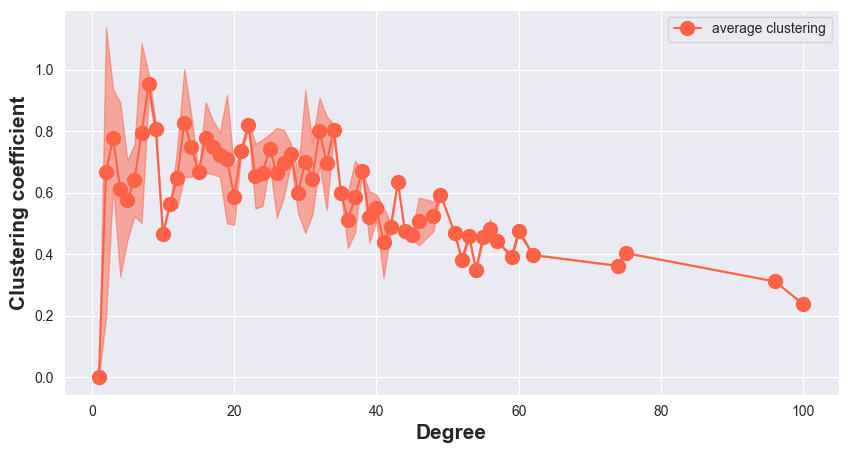

In [49]:
plt.figure(figsize = (10,5))

x = sorted(avg_clust_by_degree.keys())

y, ymin, ymax = [], [], []
for degree in x:
    avg = avg_clust_by_degree[degree]
    std = stddev_clust_by_degree[degree]
    y.append(avg)
    ymin.append(avg - std)
    ymax.append(avg + std)




plt.plot(x,y,'.-', ms = 20, color = 'tomato', label = 'average clustering')
plt.fill_between(x, ymin, ymax, color = 'tomato', alpha =0.5)
plt.xlabel('Degree', size = 15, weight = 'bold')
plt.ylabel('Clustering coefficient', size = 15, weight = 'bold')
plt.legend()
plt.draw()